<a href="https://colab.research.google.com/github/Preethi-96/ImageProcessing/blob/master/ImageSegmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


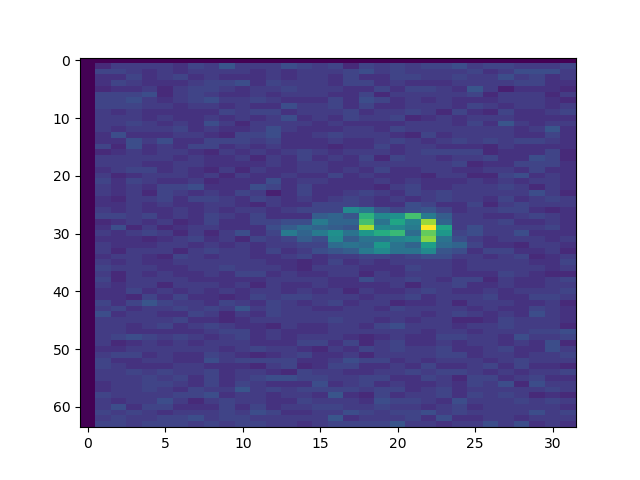

In [21]:
import os
os.chdir('/content/drive/My Drive/train/Dat1')

from PIL import Image
from IPython.display import Image as Im, display

display(Im('390.png'))

In [22]:
import pandas as pd
fp=pd.DataFrame(columns=['Image', 'X-Coordinate', 'Y-Coordinate','Weld_Area' 'Laser_Power'])

Images=[]
X_Cor=[]
Y_Cor=[]
Label=[]
W_Area=[]
Img_Path=[]

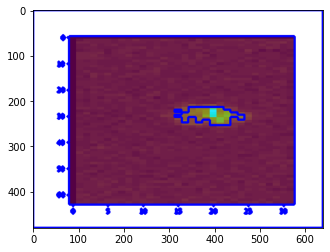

In [23]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import skimage.segmentation as seg
import skimage.color as color
import os
os.chdir('/content/drive/My Drive/train/Dat1')
files=os.listdir('/content/drive/My Drive/train/Dat1')


for f in files:
 if len(Images)<200:
   

    img = cv2.imread(f,1)
  
    Images.append(f)
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    lower_blue = np.array([110,50,50])
    upper_blue = np.array([130,255,255])
    mask = cv2.inRange(hsv, lower_blue, upper_blue)
    res = cv2.bitwise_and(hsv,hsv, mask= mask)
    #plt.imshow(mask)
    hsv[mask>0]=([130,255,255])
    RGB_again = cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)
    gray = cv2.cvtColor(RGB_again, cv2.COLOR_RGB2GRAY)
    #plt.imshow(gray,cmap='gray')
    ret, threshold = cv2.threshold(gray, 70, 250, 0)
    #plt.imshow(threshold)
    contours, hierarchy =  cv2.findContours(threshold,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    cv2.drawContours(img, contours, -1, (0, 0, 255), 3)
    plt.imshow(img)
    largest_area = 0
    largest_contour_index = -1
    i = 0
    data=[]
    areas=[]
    ar=0
    total_contours = len(contours)
    while (i < total_contours ):
        area = cv2.contourArea(contours[i])
        areas.append(area)
        cnt = contours[i]
        M = cv2.moments(cnt)
        cX = int(M["m10"] / M["m00"])
        cY = int(M["m01"] / M["m00"])
        if int(area) in range(1000,10000):
          data.append([cX,cY])
          ar=area
        
        i+=1
       
    
    if len(data)==1:
      
      X_Cor.append(data[0][0])
      Y_Cor.append(data[0][1])
      Label.append('Power_1')
      W_Area.append(ar)
      Img_Path.append(os.getcwd()+'/'+f)
    else:
      
      Images.pop()

    


    # x, y = zip(*data)
    # print(data)
    # plt.imshow(img)
    # plt.scatter(x, y)
    # plt.show()


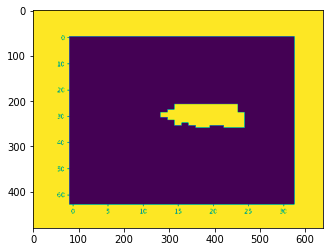

In [24]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import skimage.segmentation as seg
import skimage.color as color
import os
os.chdir('/content/drive/My Drive/train/Dat3')
files=os.listdir('/content/drive/My Drive/train/Dat3')

for f in files:
  if len(Images)<400:


    img = cv2.imread(f,1)
    Images.append(f)
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    lower_blue = np.array([20,20,100])
    upper_blue = np.array([130,250,200])
    mask = cv2.inRange(hsv, lower_blue, upper_blue)
    res = cv2.bitwise_and(hsv,hsv, mask= mask)
    hsv[mask>0]=([130,250,200])
    plt.imshow(hsv)
    RGB_again = cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)
    gray = cv2.cvtColor(RGB_again, cv2.COLOR_RGB2GRAY)
    ret, threshold = cv2.threshold(gray, 41, 250, 0)
    plt.imshow(threshold)
    contours, hierarchy =  cv2.findContours(threshold,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    cv2.drawContours(img, contours, -1, (0, 0, 255), 3)
    largest_area = 0
    largest_contour_index = -1
    i = 0
    data=[]
    areas=[]
    total_contours = len(contours)
    while (i < total_contours ):
        area = cv2.contourArea(contours[i])
        areas.append(area)
        cnt = contours[i]
        
        M = cv2.moments(cnt)
        cX = int(M["m10"] / M["m00"])
        cY = int(M["m01"] / M["m00"])
        if int(area) in range(1000,10000):
          data.append([cX,cY])
        i+=1
        #print(cX,cY)
        
    #print(len(data))     
    #x, y = zip(*data)
    if len(data)==1:
      X_Cor.append(data[0][0])
      Y_Cor.append(data[0][1])
      Label.append('Power_2')
      W_Area.append(ar)
      Img_Path.append(os.getcwd()+'/'+f)
      #print(os.getcwd()+'/'+f)
    else:
      
      Images.pop()
    # plt.imshow(img)
    # plt.scatter(x, y)
    # plt.show()


In [25]:
print(len(Label))
#Images.pop()

400


In [26]:
print(len(Label))
fp=pd.DataFrame(columns=['Image', 'X-Coordinate', 'Y-Coordinate','Weld_Area','Laser_Power','Image_Path'])

#imageid_path_dict = {os.path.splitext(os.path.basename(x))[0]: x
                     #for x in glob(os.path.join(base_skin_dir, '*', '*.png'))}

fp['Image']=Images
fp['X-Coordinate']=X_Cor
fp['Y-Coordinate']=Y_Cor
fp['Weld_Area']=W_Area
fp['Laser_Power']=Label
fp['Image_Path']=Img_Path

print(fp.head())

fp['Laser_Power'] = pd.get_dummies(fp['Laser_Power'])

#Preparing train dataset
os.chdir('/content/drive/My Drive/')
fp.to_csv('Welding_Data_train.csv')

400
    Image  X-Coordinate  ...  Laser_Power                                 Image_Path
0  19.png           379  ...      Power_1  /content/drive/My Drive/train/Dat1/19.png
1  20.png           378  ...      Power_1  /content/drive/My Drive/train/Dat1/20.png
2  21.png           391  ...      Power_1  /content/drive/My Drive/train/Dat1/21.png
3  22.png           373  ...      Power_1  /content/drive/My Drive/train/Dat1/22.png
4  23.png           385  ...      Power_1  /content/drive/My Drive/train/Dat1/23.png

[5 rows x 6 columns]


In [8]:
fp['Image']=fp['Image_Path'].map(lambda x: np.asarray(Image.open(x).resize((400,400))))
print(fp.head())

                                               Image  ...                                 Image_Path
0  [[[255, 255, 255, 255], [255, 255, 255, 255], ...  ...  /content/drive/My Drive/train/Dat1/19.png
1  [[[255, 255, 255, 255], [255, 255, 255, 255], ...  ...  /content/drive/My Drive/train/Dat1/20.png
2  [[[255, 255, 255, 255], [255, 255, 255, 255], ...  ...  /content/drive/My Drive/train/Dat1/21.png
3  [[[255, 255, 255, 255], [255, 255, 255, 255], ...  ...  /content/drive/My Drive/train/Dat1/22.png
4  [[[255, 255, 255, 255], [255, 255, 255, 255], ...  ...  /content/drive/My Drive/train/Dat1/23.png

[5 rows x 6 columns]


In [9]:
fp['Image'].map(lambda x: x.shape).value_counts()

(400, 400, 4)    400
Name: Image, dtype: int64

In [10]:
#Preparation of data for test dataset

import pandas as pd
fpt=pd.DataFrame(columns=['Image', 'X-Coordinate', 'Y-Coordinate','Weld_Area' 'Laser_Power'])

Images=[]
X_Cor=[]
Y_Cor=[]
Label=[]
W_Area=[]
Img_Path=[]

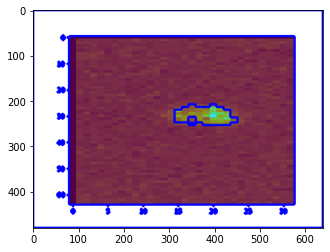

In [11]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import skimage.segmentation as seg
import skimage.color as color
import os
os.chdir('/content/drive/My Drive/test/Dat1')
files=os.listdir('/content/drive/My Drive/test/Dat1')


for f in files:
 if len(Images)<200:
   

    img = cv2.imread(f,1)
  
    Images.append(f)
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    lower_blue = np.array([110,50,50])
    upper_blue = np.array([130,255,255])
    mask = cv2.inRange(hsv, lower_blue, upper_blue)
    res = cv2.bitwise_and(hsv,hsv, mask= mask)
    #plt.imshow(mask)
    hsv[mask>0]=([130,255,255])
    RGB_again = cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)
    gray = cv2.cvtColor(RGB_again, cv2.COLOR_RGB2GRAY)
    #plt.imshow(gray,cmap='gray')
    ret, threshold = cv2.threshold(gray, 70, 250, 0)
    #plt.imshow(threshold)
    contours, hierarchy =  cv2.findContours(threshold,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    cv2.drawContours(img, contours, -1, (0, 0, 255), 3)
    plt.imshow(img)
    largest_area = 0
    largest_contour_index = -1
    i = 0
    data=[]
    areas=[]
    ar=0
    total_contours = len(contours)
    while (i < total_contours ):
        area = cv2.contourArea(contours[i])
        areas.append(area)
        cnt = contours[i]
        M = cv2.moments(cnt)
        cX = int(M["m10"] / M["m00"])
        cY = int(M["m01"] / M["m00"])
        if int(area) in range(1000,10000):
          data.append([cX,cY])
          ar=area
        
        i+=1
       
    
    if len(data)==1:
      
      X_Cor.append(data[0][0])
      Y_Cor.append(data[0][1])
      Label.append('Power_1')
      W_Area.append(ar)
      Img_Path.append(os.getcwd()+'/'+f)
    else:
      
      Images.pop()

    


    # x, y = zip(*data)
    # print(data)
    # plt.imshow(img)
    # plt.scatter(x, y)
    # plt.show()


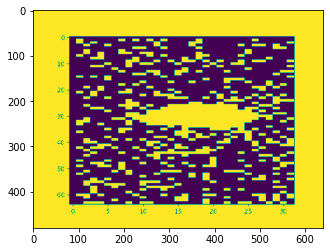

In [12]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import skimage.segmentation as seg
import skimage.color as color
import os
os.chdir('/content/drive/My Drive/test/Dat3')
files=os.listdir('/content/drive/My Drive/test/Dat3')

for f in files:
  if len(Images)<400:


    img = cv2.imread(f,1)
    Images.append(f)
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    lower_blue = np.array([20,20,100])
    upper_blue = np.array([130,250,200])
    mask = cv2.inRange(hsv, lower_blue, upper_blue)
    res = cv2.bitwise_and(hsv,hsv, mask= mask)
    hsv[mask>0]=([130,250,200])
    plt.imshow(hsv)
    RGB_again = cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)
    gray = cv2.cvtColor(RGB_again, cv2.COLOR_RGB2GRAY)
    ret, threshold = cv2.threshold(gray, 41, 250, 0)
    plt.imshow(threshold)
    contours, hierarchy =  cv2.findContours(threshold,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    cv2.drawContours(img, contours, -1, (0, 0, 255), 3)
    largest_area = 0
    largest_contour_index = -1
    i = 0
    data=[]
    areas=[]
    total_contours = len(contours)
    while (i < total_contours ):
        area = cv2.contourArea(contours[i])
        areas.append(area)
        cnt = contours[i]
        
        M = cv2.moments(cnt)
        cX = int(M["m10"] / M["m00"])
        cY = int(M["m01"] / M["m00"])
        if int(area) in range(1000,10000):
          data.append([cX,cY])
        i+=1
        #print(cX,cY)
        
    #print(len(data))     
    #x, y = zip(*data)
    if len(data)==1:
      X_Cor.append(data[0][0])
      Y_Cor.append(data[0][1])
      Label.append('Power_2')
      W_Area.append(ar)
      Img_Path.append(os.getcwd()+'/'+f)
      #print(os.getcwd()+'/'+f)
    else:
      
      Images.pop()
    # plt.imshow(img)
    # plt.scatter(x, y)
    # plt.show()


In [17]:
print(len(Label))
fp=pd.DataFrame(columns=['Image', 'X-Coordinate', 'Y-Coordinate','Weld_Area','Laser_Power','Image_Path'])

#imageid_path_dict = {os.path.splitext(os.path.basename(x))[0]: x
                     #for x in glob(os.path.join(base_skin_dir, '*', '*.png'))}

fp['Image']=Images
fp['X-Coordinate']=X_Cor
fp['Y-Coordinate']=Y_Cor
fp['Weld_Area']=W_Area
fp['Laser_Power']=Label
fp['Image_Path']=Img_Path

print(fp.head())

fp['Laser_Power'] = pd.get_dummies(fp['Laser_Power'])

#Preparing test dataset

fp.to_csv('Welding_Data_test.csv')

179
     Image  X-Coordinate  ...  Laser_Power                                 Image_Path
0  502.png           391  ...      Power_1  /content/drive/My Drive/test/Dat1/502.png
1  507.png           377  ...      Power_1  /content/drive/My Drive/test/Dat1/507.png
2  508.png           391  ...      Power_1  /content/drive/My Drive/test/Dat1/508.png
3  509.png           375  ...      Power_1  /content/drive/My Drive/test/Dat1/509.png
4  510.png           381  ...      Power_1  /content/drive/My Drive/test/Dat1/510.png

[5 rows x 6 columns]
